In [1]:
import warnings
warnings.filterwarnings('ignore')

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# inspect train
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# inspect test
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# slice out label column , convert to array and float32
X = (train.iloc[:,1:].values).astype('float32')

# first column in train is the labels, convert to array and int32
y = train['label'].values.astype('int32')

# convert test to array and float32
test_X = test.values.astype('float32')

Text(0.5,1,'Count for digit each label')

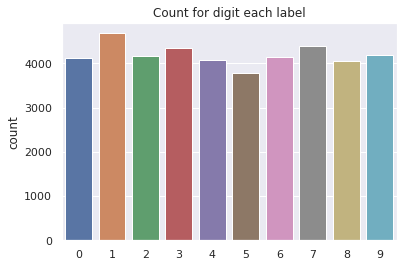

In [6]:
# plot of total count of each digit label
sns.countplot(y)
plt.title('Count for digit each label')

In [7]:
# function to plot images from train set
def plot_images(drawing, rows = 5, cols = 5):
    fig, ax = plt.subplots(figsize=(cols, rows))
    ax.axis('off')
    
    for i in list(range(0, min(len(drawing), (rows * cols)))):
        a = fig.add_subplot(rows, cols, i + 1)
        imgplot = plt.imshow(drawing[i, :784].reshape(28,28), cmap='gist_gray')
        plt.xticks([])
        plt.yticks([])

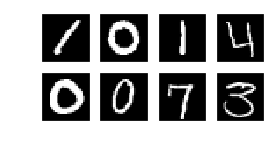

In [8]:
# plot images to visualize data
plot_images(X, rows=2, cols=4)

#### Preprocessing

In [9]:
# change dimension of images to [N, 28, 28, 1]
X = X.reshape(X.shape[0], 28, 28,1)
test_X = test_X.reshape(test_X.shape[0], 28, 28, 1)
print(X.shape, test_X.shape)

# normalize the images
X /= 255
test_X /= 255

(42000, 28, 28, 1) (28000, 28, 28, 1)


In [10]:
# import keras for neural network
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [11]:
# size of samples to go through train on each epoch
batch_size = 100

# number of classifications
num_classes = 10

# number of times to go through train set 
epochs = 20

In [12]:
# split train test 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 69)

In [13]:
# one hot label y_train and y_test
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [14]:
%%time
# build neural network
model = Sequential()
model.add(Conv2D(256, kernel_size=(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 256)       2560      
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
__________

In [15]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
%%time
history = model.fit(x_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
33600/33600 [==============================] - 116s 3ms/step - loss: 0.2642 - acc: 0.9186
Epoch 2/10
33600/33600 [==============================] - 108s 3ms/step - loss: 0.0943 - acc: 0.9720
Epoch 3/10
33600/33600 [==============================] - 107s 3ms/step - loss: 0.0648 - acc: 0.9806
Epoch 4/10
33600/33600 [==============================] - 109s 3ms/step - loss: 0.0543 - acc: 0.9831
Epoch 5/10
33600/33600 [==============================] - 110s 3ms/step - loss: 0.0522 - acc: 0.9849
Epoch 6/10
33600/33600 [==============================] - 109s 3ms/step - loss: 0.0474 - acc: 0.9869
Epoch 7/10
33600/33600 [==============================] - 113s 3ms/step - loss: 0.0440 - acc: 0.9871
Epoch 8/10
33600/33600 [==============================] - 111s 3ms/step - loss: 0.0440 - acc: 0.9871
Epoch 9/10
33600/33600 [==============================] - 112s 3ms/step - loss: 0.0380 - acc: 0.9882
Epoch 10/10
33600/33600 [==============================] - 112s 3ms/step - loss: 0.0404 - a

In [19]:
score = model.evaluate(x_test, y_test)

8400/8400 [==============================] - 9s 1ms/step


In [20]:
print('loss:', score[0])
print('accuracy:', score[1])

loss: 0.0519447000854693
accuracy: 0.986904761904762


In [21]:
prediction = model.predict_classes(test_X)

In [22]:
submit = pd.DataFrame({'ImageId': list(range(1, len(prediction)+1)), "Label": prediction})
submit.to_csv('mnist_digit.csv', index=False)